# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.076138e+01     7.064480e+00
 * time: 0.006855010986328125
     1     2.801726e+01     4.455420e+00
 * time: 0.019271135330200195
     2     2.135779e+01     5.136516e+00
 * time: 0.0457921028137207
     3     1.364632e+01     1.554324e+00
 * time: 0.07553696632385254
     4     1.270143e+01     1.874078e+00
 * time: 0.09704804420471191
     5     1.199012e+01     2.030941e+00
 * time: 0.1199331283569336
     6     1.151597e+01     2.686633e+00
 * time: 0.1409449577331543
     7     1.058611e+01     1.366418e+00
 * time: 0.1611330509185791
     8     1.013024e+01     1.208684e+00
 * time: 0.18139290809631348
     9     9.704510e+00     1.181429e+00
 * time: 0.20265603065490723
    10     9.490260e+00     6.623197e-01
 * time: 0.22475290298461914
    11     9.420743e+00     7.687011e-01
 * time: 0.2411799430847168
    12     9.336237e+00     4.962410e-01
 * time: 0.2608530521392822
    13     9.300507e+00     4.423052e-01
 * time: 0.2

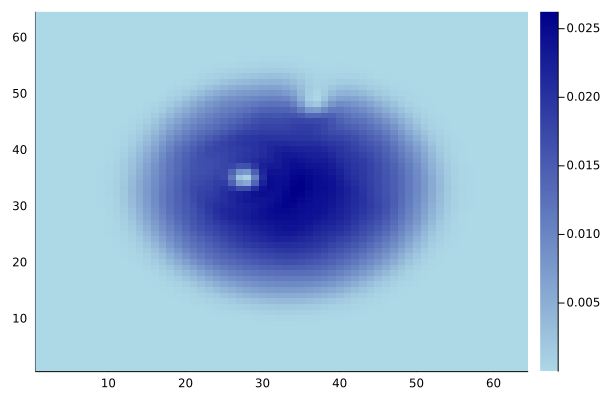

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)